# Notebook dedicated to practicing and confirming linear regression ideas

### Imports:

In [148]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split

## Data: 

In [127]:
insurance_data = pd.read_csv('insurance.csv')
X, y = insurance_data.drop('charges', axis=1), insurance_data['charges']

In [141]:
set(X['region'])
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

### Transform categorical into dummy variables:
- must change `sex` to 1 or 0 (1 = male)
- must change `smoker` to 1 or 0 (1 = smoker)
- region is 1 of 4: `{'northeast', 'northwest', 'southeast', 'southwest'}`

In [129]:
X['sex'] = X['sex'].apply({'male' : 1, 'female' : 0}.get)

In [131]:
X['smoker'] = X['smoker'].apply({'yes' : 1, 'no' : 0}.get)

In [133]:
X['region'] = X['region'].apply({'northeast' : 0,
                                 'northwest' : 1,
                                 'southeast' : 2,
                                 'southwest' : 3}.get)

### Data are now transformed

## Now visuliaztions

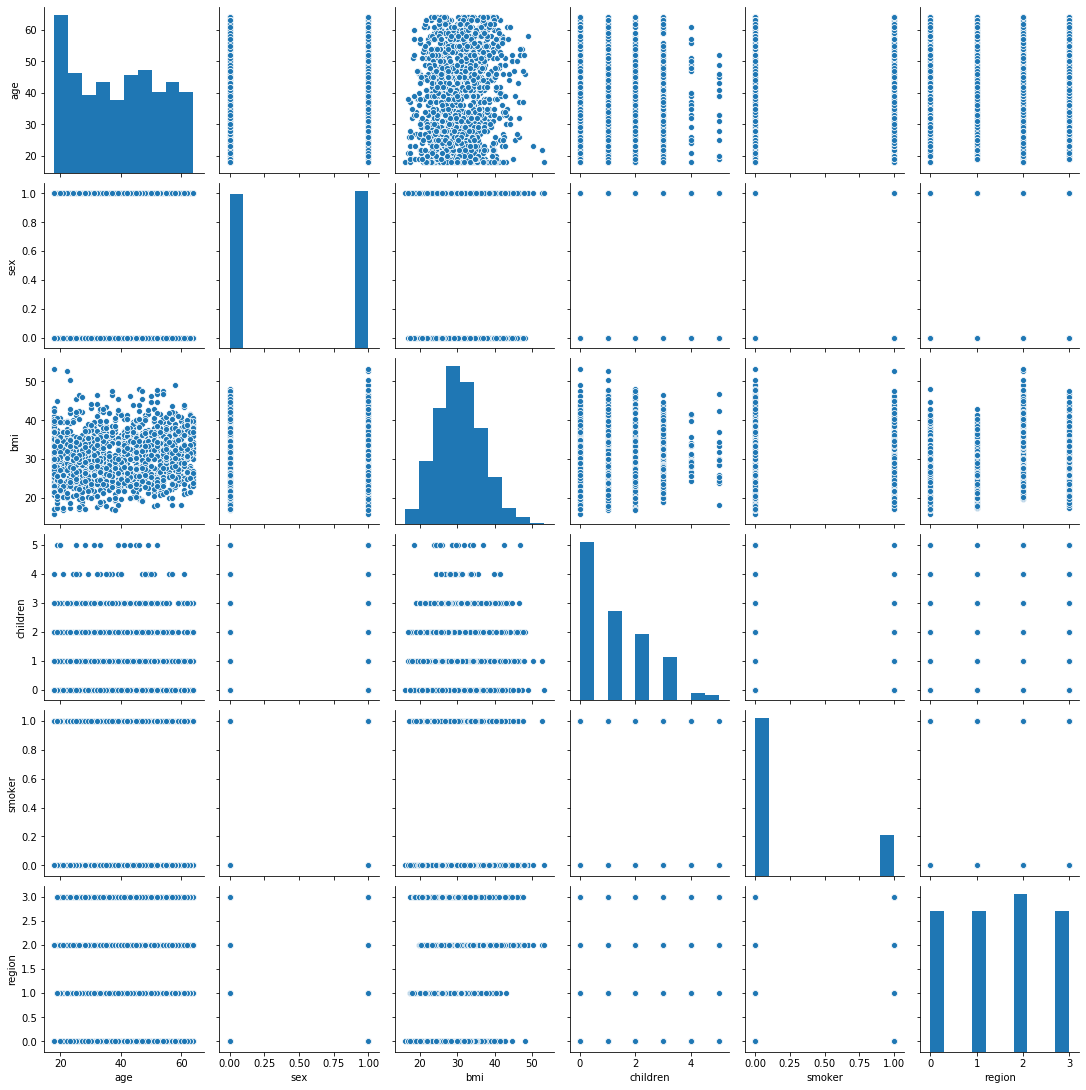

In [135]:
sns.pairplot(X[X.columns])

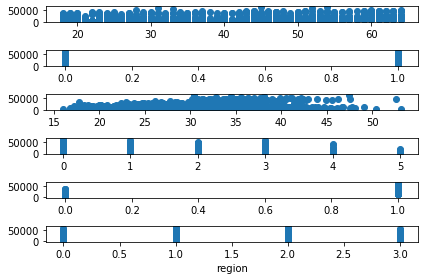

In [143]:
fig, ax = plt.subplots(len(X.columns))
num = 0
for name in X.columns:
    ax[num].scatter(X[name], y)
    num += 1
    plt.xlabel(f'{name}')
fig.tight_layout()

In [144]:
## come back to viz

## Build model

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [149]:
lm = LinearRegression()

In [150]:
lm.fit(X_train, y_train)

LinearRegression()

In [153]:
y_hat = lm.predict(X_test)

In [155]:
residuals = y_test - y_hat

Text(0.5, 1.0, 'Scatter for hetero test')

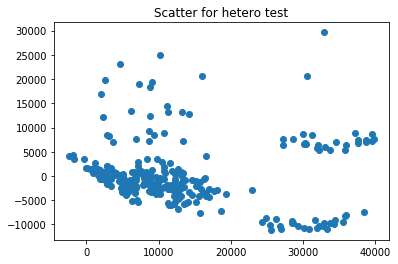

In [158]:
plt.scatter(y_hat, residuals)
plt.title('Scatter for hetero test')

In [160]:
# R2 score
r2_score(y_test, y_hat)

0.698284946164131